In [128]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [129]:
experiment=4
func='rastrigin'
out_best = f'exp{experiment}_{func}.npy'
path = Path(f'../../data/results2/exp{experiment}/{func}')

In [130]:
D = 30
frequency = 100#00_000
max_times = 100
total_generations = max_times * frequency*100000 + 1000000

In [131]:
# funcs
if func=='sphere':
    if experiment==1 or experiment==2:
        ab = pd.read_csv(path/'dC_01.csv')['b'].values
        def fitness_func(indiv, b, t): return (indiv.data**2).sum()
        def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

    elif experiment==3:
        ab=[]
        # experiment 3: dynamic fitness function (linear)
        def fitness_func(indiv, b, t): return ((indiv.data +0.1*t)**2).sum()
        def constraint_func(indiv, b, t): return 0

    else:
        ab=pd.read_csv(path/'dC_01.csv')['b'].values
    # experiment 5: dynamic fitness function (x-sin(pi/2*t))^2 with random changes on peak of sin
        def fitness_func(indiv, b, t): return ((indiv.data-b[t]*np.sin(np.pi/2*t))**2).sum()
        def constraint_func(indiv, b, t): return 0
    
elif func=='rastrigin':
    if experiment==1 or experiment==2:
        ab = pd.read_csv(path/'dC_01.csv')['b'].values
        def fitness_func(indiv, b, t): return 10*D+((indiv.data**2)-10*np.cos(2*np.pi*indiv.data)).sum()
        def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

    elif experiment==3:
        ab=[]
        # experiment 3: dynamic fitness function (linear)
        def fitness_func(indiv, b, t): return 10*D+(((indiv.data+0.1*t)**2)-10*np.cos(2*np.pi*indiv.data)).sum()
        def constraint_func(indiv, b, t): return 0

    else:
        ab=pd.read_csv(path/'dC_01.csv')['b'].values
    # experiment 5: dynamic fitness function (x-sin(pi/2*t))^2 with random changes on peak of sin
        def fitness_func(indiv, b, t): return 10*D+(((indiv.data-b[t]*np.sin(np.pi/2*t))**2)-10*np.cos(2*np.pi*indiv.data)).sum()
        def constraint_func(indiv, b, t): return 0

elif func=='rosenbrock':
    if experiment==1 or experiment==2:
        ab = pd.read_csv(path/'dC_01.csv')['b'].values
        def fitness_func(indiv, b, t): return ((100 * (indiv.data[1:] - indiv.data[:-1]**2)**2) + (1-indiv.data[:-1])**2).sum()
        def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

    elif experiment==3:
        ab=[]
        # experiment 3: dynamic fitness function (linear)
        def fitness_func(indiv, b, t): return (100 * (((indiv.data[1:]+0.1*t) - (indiv.data[:-1]+0.1*t)**2)**2) + (1-indiv.data[:-1]-0.1*t)**2).sum()
        def constraint_func(indiv, b, t): return 0

    else:
        ab=pd.read_csv(path/'dC_01.csv')['b'].values
    # experiment 5: dynamic fitness function (x-sin(pi/2*t))^2 with random changes on peak of sin
        def fitness_func(indiv, b, t): return (((100 * ((indiv.data[1:]-b[t]*np.sin(np.pi/2*t)) - (indiv.data[:-1]-b[t]*np.sin(np.pi/2*t))**2)**2) + (1-indiv.data[:-1]+b[t]*np.sin(np.pi/2*t))**2)).sum()
        def constraint_func(indiv, b, t): return 0

In [132]:
# population = Population.new_random(dimension=D)

# opt = Optimization(population, fitness_func, constraint_func, fitness_params=ab, constraint_params=[ab],
#                    max_times=max_times, frequency=frequency, callbacks=[OnChangeRestartPopulation])
# opt.state_dict

In [133]:
population = Population.new_random(dimension=D)
save_bests = partial(SaveBestIndividuals, out_path=out_best)

opt = Optimization(population, fitness_func, constraint_func, fitness_params=ab, constraint_params=[ab],
                   max_times=max_times, frequency=frequency,
                   callbacks=[OnChangeRestartPopulation, save_bests])
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'time_evals': 0, 'best': None}

Total time: 12:15:28


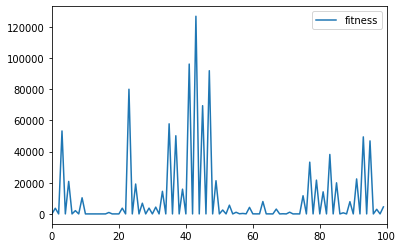

In [134]:
opt.run(total_generations, update_each=1)

# PCA

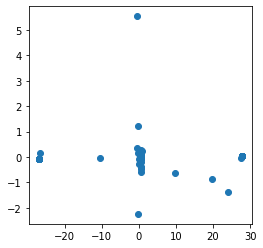

In [135]:
from sklearn.decomposition import PCA

all_bests = np.stack(opt.save_best_individuals.bests)
pca = PCA(2)
all_bests_reduced = pca.fit_transform(all_bests)
plt.figure(figsize=(4,4))
plt.plot(all_bests_reduced[:,0], all_bests_reduced[:,1], 'o');

# Save run

In [136]:
df = pd.DataFrame({'fitness':opt.recorder.best_times_fitness, 'sum_constraints':opt.recorder.best_times_constraints})
df.head()

,fitness,sum_constraints
0,0.994959,0
1,3642.550830,0
2,0.994959,0
3,53243.051520,0
4,0.000000,0


In [ ]:
# path.mkdir(parents=True, exist_ok=True)
# df.to_csv(path/'best_known.csv', index=False)